In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/sample.csv.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv


# ****Taxi Fare Prediction****
The aim of this project is to build the most accurate models for predicting the total amount paid by travellers for taxi rides. Hence this is a regression type of problem.

# ****Step 1**** 
Importing the libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import ExtraTreesRegressor

# ****Step 2****
Loading the dataset

In [3]:
data = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv') #Loading the train data
X_test = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv') #Loading the test data

In [4]:
sample_data = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/sample.csv.csv')
sample_data.head() # To analyse the format of sample data

,ID,total_amount
0,1,24.456348
1,2,24.374058
2,3,19.878154
3,4,25.015569
4,5,22.252489


Exploratory Data Analysis

In [5]:
data.shape #To obtain shape of the data frame

(175000, 17)

In [6]:
data.head() #To display first five rows to see data's structure

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0


In [7]:
data.info() #To get information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   tpep_pickup_datetime   175000 non-null  object 
 2   tpep_dropoff_datetime  175000 non-null  object 
 3   passenger_count        168923 non-null  float64
 4   trip_distance          175000 non-null  float64
 5   RatecodeID             168923 non-null  float64
 6   store_and_fwd_flag     168923 non-null  object 
 7   PULocationID           175000 non-null  int64  
 8   DOLocationID           175000 non-null  int64  
 9   payment_type           175000 non-null  object 
 10  extra                  175000 non-null  float64
 11  tip_amount             175000 non-null  float64
 12  tolls_amount           175000 non-null  float64
 13  improvement_surcharge  175000 non-null  float64
 14  total_amount           175000 non-nu

In [8]:
#Inference from the data:-
  #*There are two string datetime objects which have to be converted into python datetime objects.
  #*There are two categorical columns, store_and_fwd_flag and payment_type
  #*There are null values in 5 columns

# ****Step 3****
****Visualising the data****

In [9]:
#Visualizing the distribution of the target total amount 

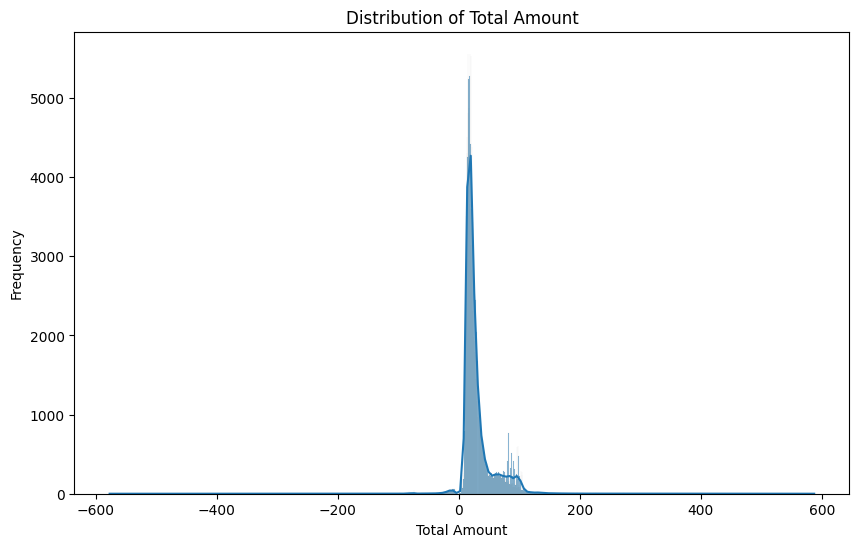

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data['total_amount'], kde=True)
plt.title('Distribution of Total Amount')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.show()

In [11]:
#Relation between Trip Distance and Total Amount

<Axes: xlabel='trip_distance', ylabel='total_amount'>

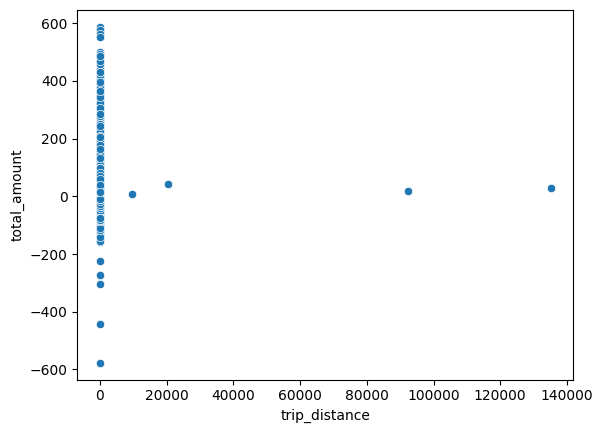

In [12]:
#Using Scatter Plot
sns.scatterplot(data=data, x="trip_distance", y="total_amount")

<Axes: xlabel='trip_distance', ylabel='total_amount'>

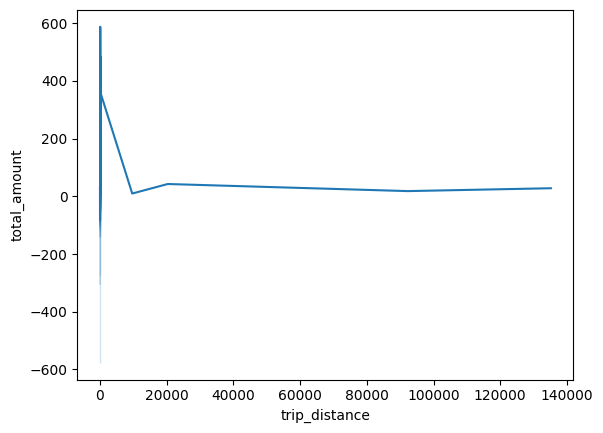

In [13]:
#Using Line Plot
sns.lineplot(data=data, x="trip_distance", y="total_amount")

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


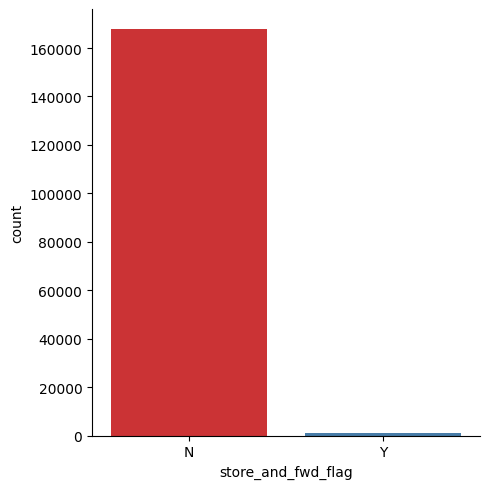

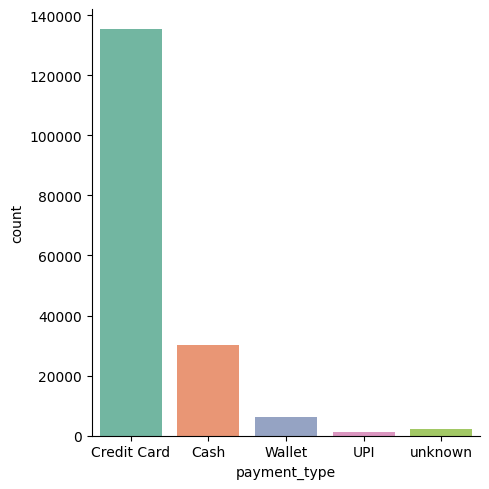

In [14]:
#Visualising categorical columns using catplot
sns.catplot(data=data, x='store_and_fwd_flag', kind='count',palette='Set1')
sns.catplot(data=data, x='payment_type', kind='count',palette='Set2')

# ****Step 4****
Preprocessing of dataset

1) Preprocessing of tpep_dropoff_datetime and tpep_pickup_datetime columns

Feature Extraction

In [15]:
#1) The data contains two string datetime objects. They are
        #*Dropoff time
        #*Pickup time
    #To find the difference between these two objects, these string datetime objects are converted into python datetime objects.

In [16]:
data['time_diff'] = (((pd.to_datetime(data['tpep_dropoff_datetime']))- (pd.to_datetime(data['tpep_pickup_datetime']))).dt.total_seconds()/60) # converting string datetime objects to python datetime objects and computing the difference between them.
data['time_diff'] = data['time_diff'].abs() #To find the absolute value since the difference can be negative

In [17]:
data = data.drop(columns=['tpep_pickup_datetime','tpep_dropoff_datetime']) #dropping down pickup time and drop off time columns since time difference has been extracted from it.

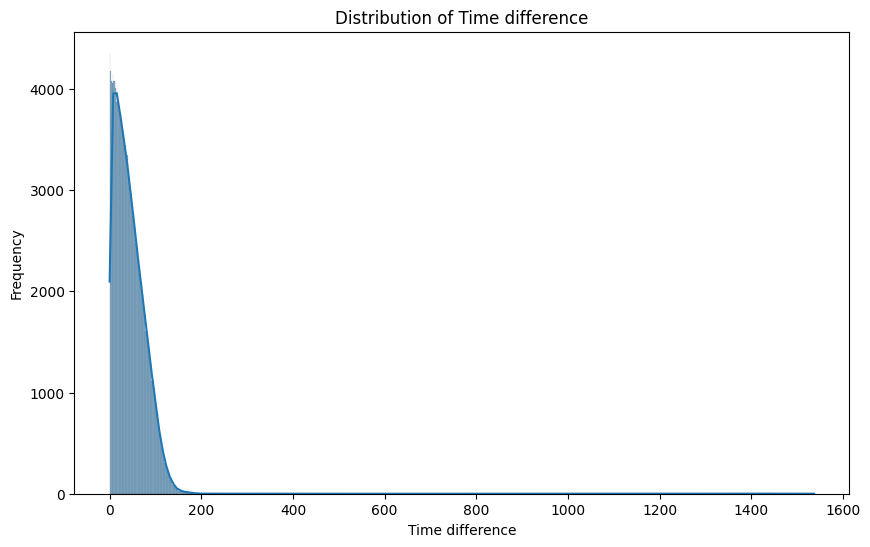

In [18]:
#Visualising time difference
plt.figure(figsize=(10, 6))
sns.histplot(data['time_diff'], kde=True)
plt.title('Distribution of Time difference')
plt.xlabel('Time difference')
plt.ylabel('Frequency')
plt.show()

2) Preprocessing of payment_type column

In [19]:
data['payment_type'].unique() #To obtain unique values of the feature payment_type

array(['Credit Card', 'Cash', 'Wallet', 'UPI', 'unknown'], dtype=object)

In [20]:
#Since payment_type is categorical, label encoding is used

In [21]:
label_encoder = LabelEncoder()
data['payment_type'] = label_encoder.fit_transform(data['payment_type']) #encoding payment_type using label encoder

3) Preprocessing of store_and_fwd_flag column

In [22]:
data['store_and_fwd_flag'].value_counts() #To obtain the number of unique value in store_and_fwd_flag

store_and_fwd_flag
N    167729
Y      1194
Name: count, dtype: int64

In [23]:
#Since most of the values are'N', filling every null values by'N'.

In [24]:
data['store_and_fwd_flag'].fillna('N', inplace=True) #fill the null values by'N'

In [25]:
#Since the store_and_fwd_flag is also categorical, label encoder is used

In [26]:
data['store_and_fwd_flag'] = label_encoder.fit_transform(data['store_and_fwd_flag']) #encoding store_fwd_flag using label encoder

In [27]:
corr_matrix = data.corr() # To find the correlation between the features
corr_matrix

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,time_diff
VendorID,1.000000,0.099990,0.002857,-0.106361,-0.126133,-0.001315,-0.003946,0.037849,-0.530096,0.043941,0.023642,-0.063197,0.039695,-0.023495,0.036483,0.011204
passenger_count,0.099990,1.000000,0.010163,-0.023627,-0.016417,-0.000822,-0.000726,-0.032669,-0.039732,0.017175,0.042856,-0.002800,0.053224,-0.002266,0.040786,0.016047
trip_distance,0.002857,0.010163,1.000000,0.014745,-0.000420,-0.000958,-0.002496,0.011516,-0.001849,0.005847,0.006778,0.000459,0.009911,-0.060883,0.126236,0.002842
RatecodeID,-0.106361,-0.023627,0.014745,1.000000,-0.004695,-0.001090,-0.000644,0.017300,-0.070959,-0.032172,0.063754,0.002579,0.055527,-0.197608,-0.004480,0.018230
store_and_fwd_flag,-0.126133,-0.016417,-0.000420,-0.004695,1.000000,0.000316,0.001456,-0.018124,0.069783,-0.013224,-0.004572,0.006723,-0.007610,0.000398,-0.004677,-0.001221
PULocationID,-0.001315,-0.000822,-0.000958,-0.001090,0.000316,1.000000,-0.000161,0.002044,0.001495,0.000748,-0.000868,-0.000501,0.000715,0.001194,-0.000654,-0.004317
DOLocationID,-0.003946,-0.000726,-0.002496,-0.000644,0.001456,-0.000161,1.000000,0.000394,0.002955,-0.000247,-0.002290,-0.002810,-0.002954,0.000641,-0.004940,-0.004939
payment_type,0.037849,-0.032669,0.011516,0.017300,-0.018124,0.002044,0.000394,1.000000,-0.134051,0.158039,0.016688,-0.270576,-0.007457,-0.148764,-0.053088,-0.001869
extra,-0.530096,-0.039732,-0.001849,-0.070959,0.069783,0.001495,0.002955,-0.134051,1.000000,0.160331,0.201179,0.170831,0.234346,0.068088,0.337456,0.014919
tip_amount,0.043941,0.017175,0.005847,-0.032172,-0.013224,0.000748,-0.000247,0.158039,0.160331,1.000000,0.411588,0.076436,0.638658,-0.059346,0.335614,0.057127


<Axes: >

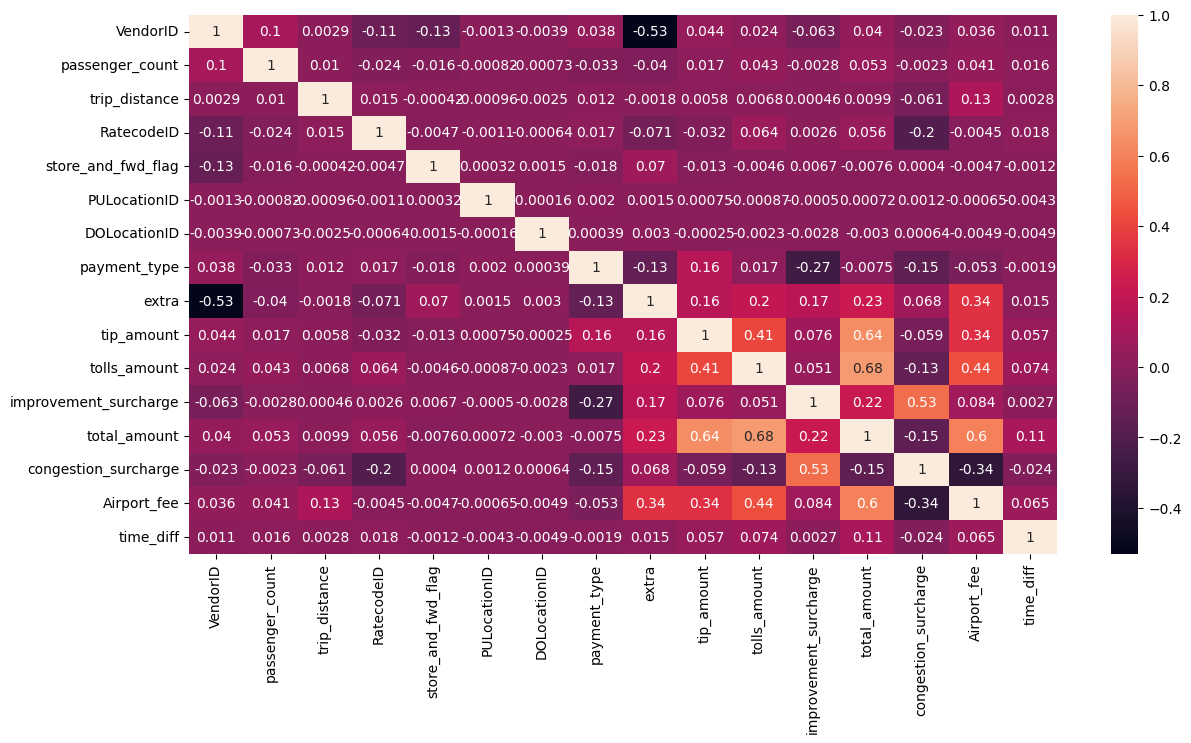

In [28]:
plt.figure(figsize=(14,7))
sns.heatmap(corr_matrix, annot=True) #visualising using heatmap

4) Dropping down unwanted columns

In [29]:
data = data.drop(columns=['VendorID','congestion_surcharge','Airport_fee']) #dropping down unwanted columns

5) Splitting the data into features and label

In [30]:
X = data.drop(columns=['total_amount']) #features
y = data['total_amount'] #label

# ****Step 5****
Splitting the data into train data and validation data

In [31]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)
print("The shape of train data is:",X_train.shape,y_train.shape)
print("The shape of validation data is:",X_val.shape,y_val.shape)

The shape of train data is: (140000, 12) (140000,)
The shape of validation data is: (35000, 12) (35000,)


Imputing the null values by using simple imputer

In [32]:
imp_mean = SimpleImputer(strategy='mean') #Here the strategy used in simple imputer is mean.
X_train = imp_mean.fit_transform(X_train)
X_val = imp_mean.transform(X_val)

# ****Step 6****
Same preprocessing steps for test data

In [33]:
#Computing time difference

In [34]:
X_test['time_diff'] = (((pd.to_datetime(X_test['tpep_dropoff_datetime']))- (pd.to_datetime(X_test['tpep_pickup_datetime']))).dt.total_seconds()/60) # converting string datetime objects to python datetime objects and computing the difference between them.
X_test['time_diff'] = X_test['time_diff'].abs() #To find the absolute value since the difference can be negative

In [35]:
#Preprocessing of store_and_fwd_flag

In [36]:
X_test['store_and_fwd_flag'].fillna('N', inplace=True)
X_test['store_and_fwd_flag'] = label_encoder.fit_transform(X_test['store_and_fwd_flag'])

In [37]:
#Preprocessing of payment_type

In [38]:
X_test['payment_type'] = label_encoder.fit_transform(X_test['payment_type']) #encoding payment_type using label encoder

In [39]:
#Dropping unwanted columns

In [40]:
X_test = X_test.drop(columns=['VendorID','tpep_pickup_datetime','tpep_dropoff_datetime','congestion_surcharge','Airport_fee']) #dropping unwanted columns

In [41]:
#Imputing the null values

In [42]:
X_test = imp_mean.fit_transform(X_test) #imputing the null values

# ****Step 7****
Model Selection and training

# Top 3 Best Models

In [43]:
#Model 1: Extra Trees Regressor
    #Submission Score: 0.93785
    #r2 score: 0.9513
    #mse score: 31.667
    #mae score: 2.862

In [44]:
#Model 2: Random Forest Regressor
    #Submission Score: 0.93531
    #r2 score: 0.9536
    #mse score: 30.1689
    #mae score: 2.8719

In [45]:
#Model 3: Gradient Boosting Regressor
    #Submission Score: 0.93022
    #r2 score: 0.9425
    #mse score: 37.40
    #mae score: 3.149

# ****Model 1: Extra Trees Regressor****

****Best Model****

In [46]:
etr = ExtraTreesRegressor(random_state=0, n_estimators=100) #Instantiate object of Extra Trees Regressor 
etr.fit(X_train, y_train) #Calling fit method to train the model
y_pred = etr.predict(X_test) #Predicting X_test
y_predetr = etr.predict(X_val) #Predicting X_val
r2etr = r2_score(y_val,y_predetr) #Obtaining r2 score
mseetr = mean_squared_error(y_val, y_predetr) #Obtaining Mean Squared Error
maeetr = mean_absolute_error(y_val, y_predetr) #Obtaining Mean Absolute Error
print("The r2 score is ", r2etr)
print("The mse score is ", mseetr)
print("The mae score is", maeetr)

The r2 score is  0.9513378780936222
The mse score is  31.667272480623424
The mae score is 2.8620772114285717


# ****Model 2: Random Forest Regressor****

In [47]:
rfr = RandomForestRegressor() #Instantiate object of Random Forest Regressor 
rfr.fit(X_train,y_train) #Calling fit method to train the model
y_predrfr = rfr.predict(X_val) #Predicting X_val
r2rfr = r2_score(y_val,y_predrfr) #Obtaining r2 score
mserfr = mean_squared_error(y_val,y_predrfr) #Obtaining Mean Squared Error
maerfr = mean_absolute_error(y_val,y_predrfr) #Obtaining Mean Absolute Error
print("The r2 score is ",r2rfr)
print("The mse score is ",mserfr)
print("The mae score is ", maerfr)

The r2 score is  0.9542634329478102
The mse score is  29.763443812756847
The mae score is  2.864233197142857


# ****Model 3: Gradient Boosting Regressor****

In [48]:
gbr = GradientBoostingRegressor(random_state=0) #Instantiate object of Gradient Boosting Regressor
gbr.fit(X_train,y_train) #Calling fit method to train the model
y_predgbr = gbr.predict(X_val) #Predicting X_val
r2gbr = r2_score(y_val,y_predgbr) #Obtaining r2 score
msegbr = mean_squared_error(y_val,y_predgbr) #Obtaining Mean Squared Error
maegbr = mean_absolute_error(y_val, y_predgbr) #Obtaining Mean Absolute Error
print("The r2 score is ",r2gbr)
print("The mse score is ",msegbr)
print("The mae score is ", maegbr)

The r2 score is  0.942524959049681
The mse score is  37.40235138349357
The mae score is  3.1494272887088517


# ****Other Models****

In [49]:
#Model 4: Voting Regressor
    #r2 score: 0.9167
    #mse score: 54.189
    #mae score: 4.188

In [50]:
#Model 5: Decision Tree Regressor
    #r2 score: 0.8857
    #mse score: 74.32
    #mae score: 4.728

In [51]:
#Model 6: KNN Regressor
    #r2 score: 0.7227
    #mse score: 180.449
    #mae score: 7.462

In [52]:
#Model 7: Ridge Regressor
    #r2 score: 0.6555
    #mse score: 224.16
    #mae score: 8.868

In [53]:
#Model 8: Linear Regression
    #r2 score: 0.6555
    #mse score: 224.16
    #mae score: 8.8688

In [54]:
#Model 9: Adaboost Regressor
    #r2 score: 0.6183
    #mse score: 248.34
    #mae score: 11.819

# ****Model 4: Linear Regressor****

In [55]:
lr = LinearRegression() #Instantiate object of Linear Regressor
lr.fit(X_train,y_train) #Calling fit method to train the model
y_predlr = lr.predict(X_val) #Predicting X_val
r2lr = r2_score(y_val,y_predlr) #Obtaining r2 score
mselr = mean_squared_error(y_val,y_predlr) #Obtaining Mean Squared Error
maelr = mean_absolute_error(y_val, y_predlr) #Obtaining Mean Absolute Error
print("The r2 score is ",r2lr)
print("The mse score is ",mselr)
print("The mae score is ",maelr)

The r2 score is  0.655536106177294
The mse score is  224.16268666637228
The mae score is  8.868802437182046


# ****Model 5: Voting Regressor****

In [56]:
#Top 4th Best Model

In [57]:
vr = VotingRegressor(estimators=[('gb',gbr),('rf',rfr),('lr',lr)]) #Instantiate object of Voting Regressor
vr.fit(X_train,y_train) #Calling fit method to train the model
y_predvr = vr.predict(X_val) #Predicting X_val
r2vr = r2_score(y_val,y_predvr) #Obtaining r2 score
msevr = mean_squared_error(y_val,y_predvr) #Obtaining Mean Squared Error
maevr = mean_absolute_error(y_val, y_predvr) #Obtaining Mean Absolute Error
print("The r2 score is ",r2vr)
print("The mse score is ",msevr)
print("The mae score is ", maevr)

The r2 score is  0.9167401229262065
The mse score is  54.1820436657422
The mae score is  4.185859333843674


# ****Model 6: Decision Tree Regressor****

In [58]:
dtr = DecisionTreeRegressor(max_depth=5) #Instantiate object of Decision Tree Regressor
dtr.fit(X_train,y_train) #Calling fit method to train the model
y_preddtr = dtr.predict(X_val) #Predicting X_val
r2dtr = r2_score(y_val,y_preddtr) #Obtaining r2 score
msedtr = mean_squared_error(y_val,y_preddtr) #Obtaining Mean Squared Error
maedtr = mean_absolute_error(y_val, y_preddtr) #Obtaining Mean Absolute Error
print("The r2 score is ",r2dtr)
print("The mse score is ",msedtr)
print("The mae score is ", maedtr)

The r2 score is  0.8857943525410829
The mse score is  74.32025598607427
The mae score is  4.728010407259367


# ****Model 7: KNN Regressor****

In [59]:
knn = KNeighborsRegressor() #Instantiate object of KNN Regressor
knn.fit(X_train,y_train) #Calling fit method to train the model
y_predknn = knn.predict(X_val) #Predicting X_val
r2knn = r2_score(y_val,y_predknn) #Obtaining r2 score
mseknn = mean_squared_error(y_val,y_predknn) #Obtaining Mean Squared Error
maeknn = mean_absolute_error(y_val, y_predknn) #Obtaining Mean Absolute Error
print("The r2 score is ",r2knn)
print("The mse score is ",mseknn)
print("The mae score is ", maeknn)

The r2 score is  0.7227103536352295
The mse score is  180.4484975888
The mae score is  7.462277942857143


# ****Model 8: Ridge Regressor****

In [60]:
ridge = Ridge(alpha=0.1) #Instantiate object of Ridge Regressor
ridge.fit(X_train,y_train) #Calling fit method to train the model
y_predridge = ridge.predict(X_val) #Predicting X_val
r2ridge = r2_score(y_val,y_predridge) #Obtaining r2 score
mseridge = mean_squared_error(y_val,y_predridge) #Obtaining Mean Squared Error
maeridge = mean_absolute_error(y_val, y_predridge) #Obtaining Mean Absolute Error
print("The r2 score is ",r2ridge)
print("The mse score is ",mseridge)
print("The mae score is ", maeridge)

The r2 score is  0.6555361215066278
The mse score is  224.1626766906834
The mae score is  8.868798518598037


# ****Model 9: Adaboost Regressor****

In [61]:
abr = AdaBoostRegressor(random_state=0, n_estimators=100) #Instantiate object of Adaboost Regressor
abr.fit(X_train,y_train) #Calling fit method to train the model
y_predabr = abr.predict(X_val) #Predicting X_val
r2abr = r2_score(y_val,y_predabr) #Obtaining r2 score
mseabr = mean_squared_error(y_val,y_predabr) #Obtaining Mean Squared Error
maeabr = mean_absolute_error(y_val, y_predabr) #Obtaining Mean Absolute Error
print("The r2 score is ",r2abr)
print("The mse score is ",mseabr)
print("The mae score is ",maeabr)

The r2 score is  0.6183818400981436
The mse score is  248.34112816569038
The mae score is  11.819947192020987


In [62]:
#Step 8: Hypertuning
#Hypertuning the model required lot of time
#Hypertuning used is GridSearchCV
#from sklearn.model_selection import GridSearchCV
#param_grid = {
    #'n_estimators': [10,50,100],
    #'criterion': ['mse', 'mae'],
    #'max_depth': [2,8,16,32,50],
    #'min_sample_split': [2,4,6],
    #'min_sample_leaf': [1,2],
    #'oob_score': [True, False],
    #'max_features': ['auto','sqrt','log2'],    
    #'bootstrap': [True, False],
    #'warm_start': [True, False],
#}
#grid_search = GridSearchCV(etr, param_grid, cv=5, scoring='r2_score', return_train_score=True)
#grid_search.fit(X_train,y_train)

# ****Step 9****
Submission

In [63]:
submission = pd.DataFrame(columns = ["ID","total_amount"])
submission["ID"] = [i for i in range(1,len(y_pred)+1)]
submission["total_amount"] = y_pred
submission.to_csv('submission.csv',index=False)

# ****Brief Explanation of the methods used****

In [64]:
#1) The libraries needed are exported.
#2) Then the data is loaded in respective variables. Exploratory Data Analysis is done to get information about the data.
#3) Since the target variable is continuous, this is regression type of problem.
#4) The distribution of total amount, two categorical columns and relation between total amount and trip distance is visualised.
#5) Time difference is computed.
#6) Payment_type is encoded using label encoder.
#7) The null values in store_and_fwd are filled with the most frequent value and encoded using label encoder.
#8) Correlation between the feature is analysed using correlation Matrix and heatmap
#9) Unwanted columns and dropped
#10) The data is split into features and labels.
#11) Then the data is split into train data and validation data.
#12) Simple Imputer is used to impute null values.
#13) The same preprocessing is done for test data.
#14) 9 models are used to compute the performance out of which 3 turned to be best.
#15) Evaluation Metrics is obtained for every models.
#16) Final Submission with two columns, ID and Total Amount and converting it to csv file.



# ****Conclusion****
****The best scoring models obtained are Extra Trees Regressor, Random Forest Regressor and Gradient Boosting Regressor. They produce good results. But Extra Trees Regressor is faster and better than Random Forest Regressor.****